<a href="https://colab.research.google.com/github/garfield-gray/MachineLearning/blob/main/pytorch/1_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.4.1+cu121'

Text(0, 0.5, 'y')

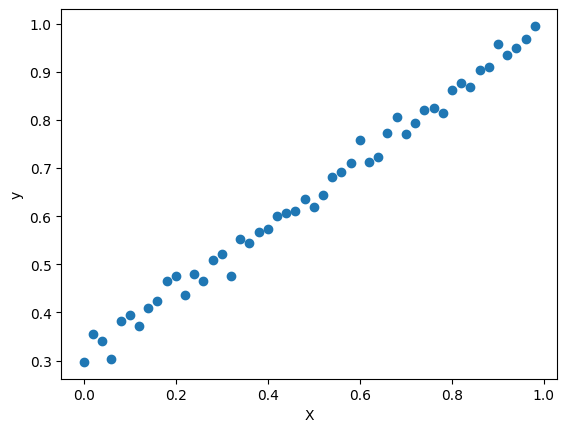

In [16]:
# prompt: we wanna do a simple regression task on torch, put weight and bias and add a normal noise to y and plot it

# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias + torch.randn(X.shape) * 0.02

# Plot the data
plt.plot(X.numpy(), y.numpy(), 'o')
plt.xlabel('X')
plt.ylabel('y')


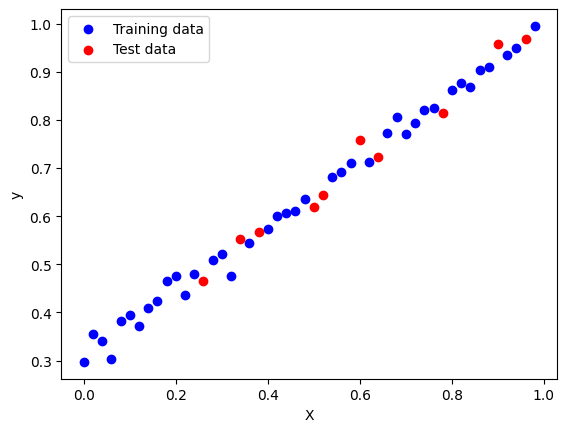

In [17]:
# prompt: split X and y into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Plot the training and test data separately
plt.scatter(X_train.numpy(), y_train.numpy(), c='blue', label='Training data')
plt.scatter(X_test.numpy(), y_test.numpy(), c='red', label='Test data')

plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.show()


In [18]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

In [19]:
model_0 = LinearRegressionModel()
model_0.state_dict()

OrderedDict([('weights', tensor([1.2978])), ('bias', tensor([0.5842]))])

In [25]:
# the main question
with torch.inference_mode():
    y_preds = model_0(X_test)


In [21]:
y_preds

tensor([[0.9216],
        [1.5965],
        [1.3629],
        [1.7522],
        [1.0254],
        [1.8301],
        [1.2590],
        [1.2331],
        [1.4148],
        [1.0773]])

In [22]:
y_test

tensor([[0.4644],
        [0.8148],
        [0.7576],
        [0.9579],
        [0.5534],
        [0.9692],
        [0.6433],
        [0.6182],
        [0.7225],
        [0.5662]])

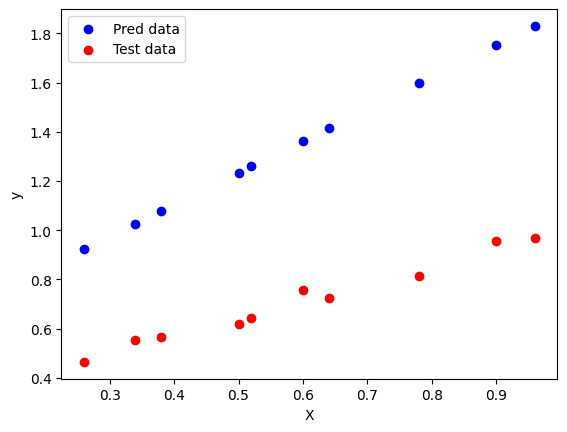

In [24]:
# prompt: scatter y_test and y_pred

# Plot the training and test data separately
plt.scatter(X_test.numpy(), y_preds.numpy(), c='blue', label='Pred data')
plt.scatter(X_test.numpy(), y_test.numpy(), c='red', label='Test data')

plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.show()


In [26]:
# you know what's the main question yeah?!